In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData

CairoMakie.activate!()
#GLMakie.activate!()

In [2]:
using JchemoData, JLD2, CairoMakie
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/cassav.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
y = dat.Y.tbc
year = dat.Y.year

280-element Vector{Int64}:
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
 2009
    ⋮
 2013
 2013
 2013
 2013
 2013
 2013
 2013
 2013
 2013

In [4]:
wl = names(X)
wl_num = parse.(Float64, wl)

1050-element Vector{Float64}:
  400.0
  402.0
  404.0
  406.0
  408.0
  410.0
  412.0
  414.0
  416.0
  418.0
    ⋮
 2482.0
 2484.0
 2486.0
 2488.0
 2490.0
 2492.0
 2494.0
 2496.0
 2498.0

In [5]:
tab(year)

OrderedCollections.OrderedDict{Int64, Int64} with 5 entries:
  2009 => 42
  2010 => 47
  2011 => 40
  2012 => 71
  2013 => 80

In [6]:
lev = sort(unique(year))

5-element Vector{Int64}:
 2009
 2010
 2011
 2012
 2013

In [7]:
nlev = length(lev)

5

In [8]:
group_num = recodcat2int(year)

280-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [9]:
fm = pcasvd(X; nlv = 6) ;

In [10]:
T = fm.T

280×6 Matrix{Float64}:
 -1.74085   -1.25003   -0.0913075  -0.0889709   -0.192093     0.122995
 -2.17482   -1.49341    0.591863   -0.0292417    0.0275222    0.046763
 -1.58075   -1.37       0.35223    -0.294774    -0.209771     0.126266
 -2.28127   -0.824354   0.644121   -0.050459     0.0769144   -0.062958
 -2.32716   -1.14473    0.477055    0.0753502   -0.0188486   -0.0400087
  0.267204  -1.18463    0.06471    -0.0105641   -0.23715      0.049133
  0.371057  -1.30703   -0.519804   -0.204556     0.131046    -0.00424144
  0.904952  -1.92103    0.119949    0.0266528   -0.0591499    0.0438553
 -1.86384   -0.918584   0.485972   -0.720374    -0.00941745   0.0205952
 -0.293073  -0.981758  -0.494169   -0.40322     -0.024332     0.0336338
  ⋮                                                           ⋮
  0.385617   0.895963   0.492763    0.0394058    0.149489     0.004446
 -0.561964   0.98245    0.598036   -0.0690756   -0.0531825   -0.15687
 -0.256313   0.973191   0.419759   -0.0274519    0.17655

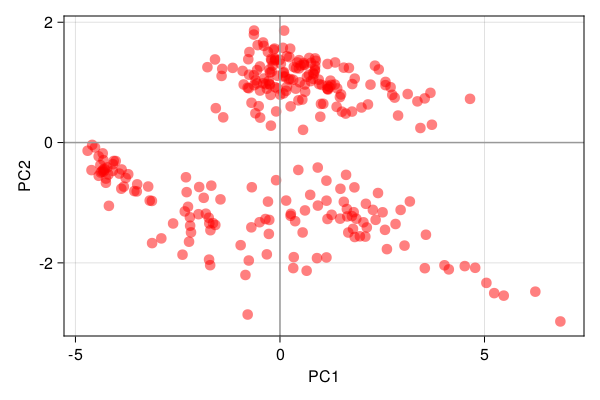

In [11]:
# 2-D Score space
i = 1
plotxy(T[:, i:(i + 1)]; color = (:red, .5),
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zeros = true, markersize = 15).f

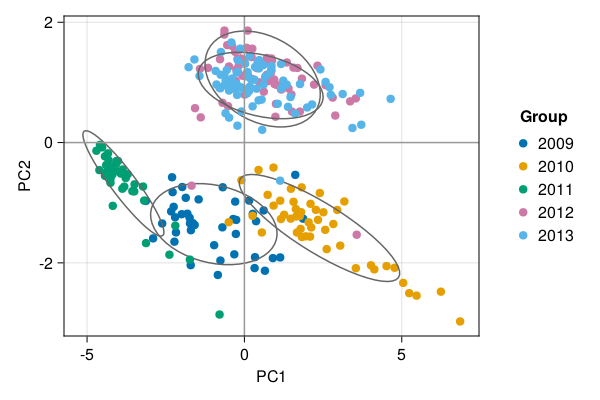

In [12]:
i = 1
plotxy(T[:, i:(i + 1)], year;
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zeros = true, ellipse = true).f

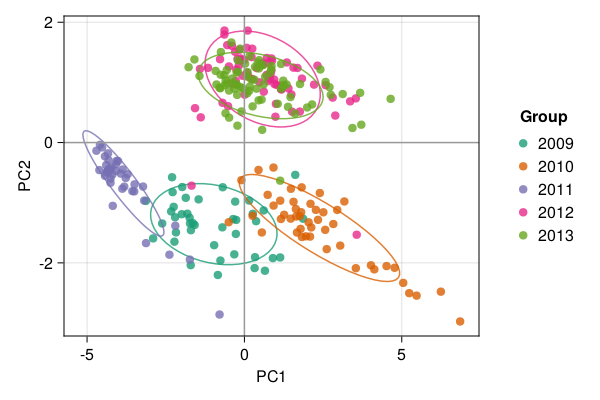

In [13]:
i = 1
colm = cgrad(:Dark2_5, nlev; categorical = true, alpha = .8)
plotxy(T[:, i:(i + 1)], year;
    color = colm,
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zeros = true, ellipse = true).f

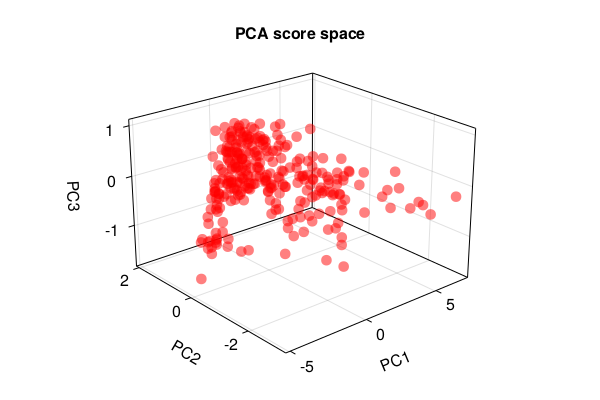

In [14]:
# 3-D Score space
CairoMakie.activate!()
#GLMakie.activate!()
i = 1
f = Figure(resolution = (600, 400))
ax = Axis3(f[1, 1]; perspectiveness = 0.2,
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zlabel = string("PC", i + 2), title = "PCA score space")
scatter!(ax, T[:, i], T[:, i + 1], T[:, i + 2];
    markersize = 15, color = (:red, .5))
f

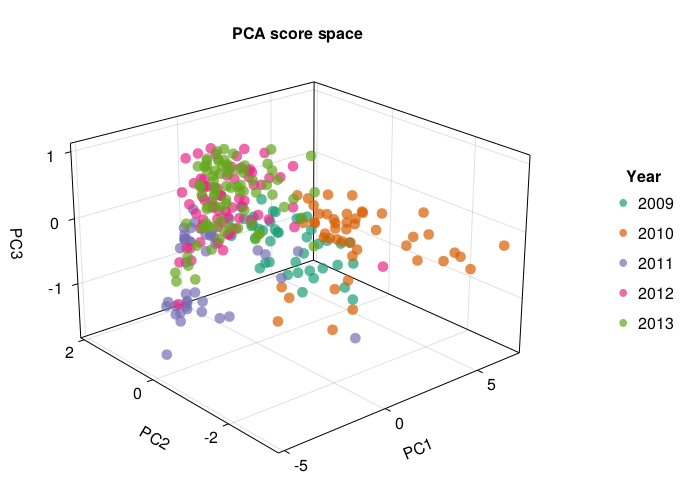

In [15]:
i = 1
f = Figure(resolution = (700, 500))
colsh = :Dark2_5 #:default, :tab10
colm = cgrad(colsh, nlev; alpha = .7, categorical = true)
ax = Axis3(f[1, 1]; perspectiveness = 0.2,
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zlabel = string("PC", i + 2),
    title = "PCA score space")
scatter!(ax, T[:, i], T[:, i + 1], T[:, i + 2],
    markersize = 15, color = group_num, colormap = colm)
lab = string.(lev)
elt = [MarkerElement(color = colm[i], marker = '●', markersize = 10) for i in 1:nlev]
title = "Year"
Legend(f[1, 2], elt, lab, title;
    nbanks = 1, rowgap = 10, framevisible = false)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*